In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Question 1.a)

In [2]:
# set parameters
L = 1.0
pi = numpy.pi
dx = 0.01 # x resolution
N_x = int(L/dx) + 1 # number of time steps
x = numpy.linspace(0.0, L, num=N_x)
T_compute = numpy.zeros((5, N_x)) # store 5 different resolutions results
terms_grid = numpy.array([1, 2, 5, 100, 1000])

In [3]:
i = 0 # index for (i+1)-th grid resolution
T_compute = numpy.zeros((5, N_x)) # clear
for j in terms_grid:
    for n in range(1,j+1): # calculate summation
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos((2 * n - 1) * pi * x / (2 * L))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1

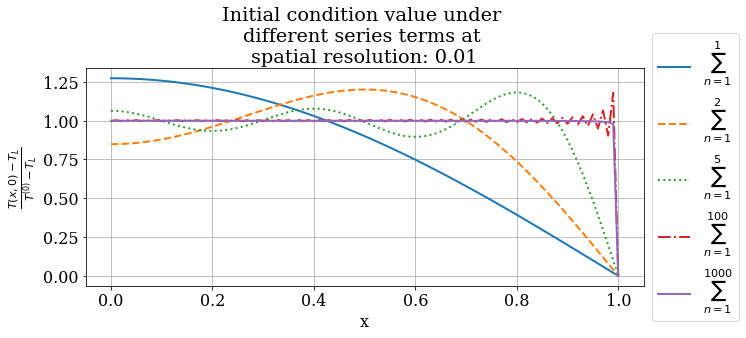

In [6]:
# plot
pyplot.figure(figsize=(10.0, 4.0))
pyplot.title('Initial condition value under \ndifferent series terms at \nspatial resolution: {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$ \sum_{n=1}^{1}$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$ \sum_{n=1}^{2}$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$ \sum_{n=1}^{5}$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$ \sum_{n=1}^{100}$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.plot(x, T_compute[4], label=r'$ \sum_{n=1}^{1000}$',
            color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

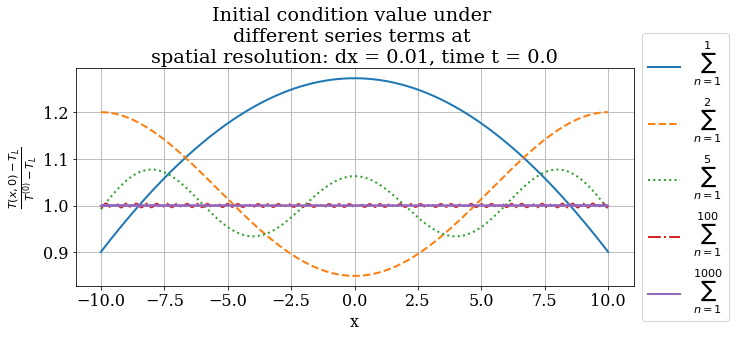

In [27]:
# if expand to (-10 , 10)
# set parameters
x_begin = -10.0
x_end = 10.0
L = x_end - x_begin
pi = numpy.pi
dx = 0.01 # x resolution
N_x = int(L/dx) + 1 # number of time steps
x = numpy.linspace(x_begin, x_end, num=N_x)
T_compute = numpy.zeros((5, N_x)) # store 5 different resolutions results
terms_grid = numpy.array([1, 2, 5, 100, 1000])

i = 0 # index for (i+1)-th grid resolution
T_compute = numpy.zeros((5, N_x)) # clear
for j in terms_grid:
    for n in range(1,j+1): # calculate summation
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos((2 * n - 1) * pi * x / (2 * L))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1
    
# plot
pyplot.figure(figsize=(10.0, 4.0))
pyplot.title('Initial condition value under \n\
different series terms at \nspatial resolution: dx = {}, time t = 0.0'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$ \sum_{n=1}^{1}$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$ \sum_{n=1}^{2}$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$ \sum_{n=1}^{5}$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$ \sum_{n=1}^{100}$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.plot(x, T_compute[4], label=r'$ \sum_{n=1}^{1000}$',
            color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Remaining Question:
1. How could we show if the series good or bad through two different domains?

2. In (-10,10), it does have period, which is related with the terms number.
    
    For n = 1, the period is 20 / 0.5 = 40
    
    For n = 2, the period is 20 / 1.0 = 20
    
    For n = 5. the period is 20 / 2.5 = 8
    
    Based on above dudction, one could take the period = 20 / (0.5 * n)
    
    For n = 100. the period is 20 / 50 = 0.4
    
    For n = 1000, the period is 20 / 500 = 0.04
    
    But for (0.0, 1.0), it seems there is no period.

## Question 1.b)

In [10]:
# set parameters
t_grid = numpy.array([0.1, 0.5, 1.0, 10.0])
D = 1.0
L = 1.0
terms_grid = 100
pi = numpy.pi
dx = 0.01
N_x = int(L/dx) + 1
x = numpy.linspace(0.0, L, N_x)
T_compute = numpy.zeros((4, N_x)) # store 4 different resolutions results

In [14]:
i = 0
T_compute = numpy.zeros((4, N_x)) # clear
for t in t_grid:
    for n in range(1, terms_grid+1):
        eigen_value = (2 * n - 1) * pi / (2 * L)
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos(eigen_value * x) * \
                        numpy.exp(-D * t * (eigen_value ** 2))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1

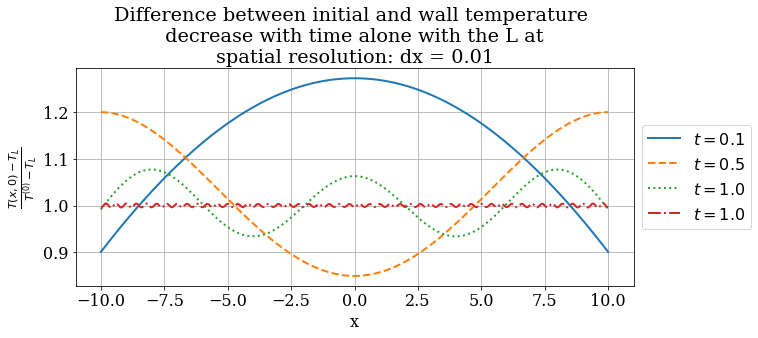

In [24]:
# plot
pyplot.figure(figsize=(10.0, 4.0))
pyplot.title('Difference between initial and wall temperature \
\n decrease with time alone with the L at \nspatial resolution: dx = {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$t = 0.1$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$t = 0.5$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$t = 1.0$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$t = 1.0$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

With time going, the spatial temperature will be all equal to TL